# More comparison between time model and distance model
===========

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import json
import space as sp
from data_extracter import json_extracter
import pandas as pd

data,events=json_extracter('data/game1.json')

## Pressure evolution
-----

We look at the pressure exerced by the closest defender of on player. For the distance model, the pressure is defined by the distance between the player and the closest defender. Then, for the time model, the pressure is defined by the time that the closest defender needs to join player's position. 

We are going to compare these two types of pressure (distance pressure and time pressure).

## Court evolution
-----

Let's have a look at the lage between time model and distance model. To do so, we plot the heat-map taking into account inertia at a moment t. Then we plot the court with distance model at t and then t+Dt. It semms that the heat-map with inertia corresponds more with distance heat-map at t+Dt.

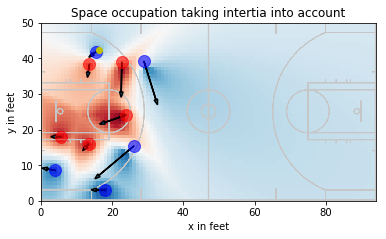

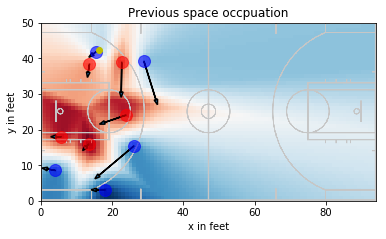

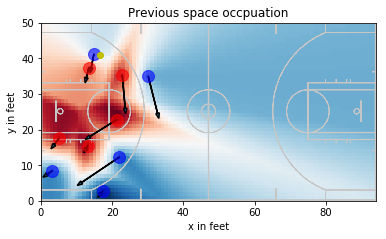

In [2]:
plt.figure(1)
plt.title('Space occupation taking intertia into account')
sp.print_court_teams_occupation_inertia(events,0,25)
plt.figure(2)
plt.title('Previous space occpuation')
sp.print_court_teams_occupation(events,0,25,value=True)
plt.figure(3)
plt.title('Previous space occpuation')
sp.print_court_teams_occupation(events,0,35,value=True)

We are going to try to quantify this observation. To do so, we calculate the correlation between space occupation with time and distance model and it will give us the lag. As force is the factor that can change in our study, we calculate the correlation for different forces and then we look the evolution of the correlation in function of forces. Here are the results.

In [34]:
import pandas as pd
lags=pd.read_csv('data/total_df_final.csv',sep = ',',index_col=[0,1,2])
lags.dropna(inplace=True)

In [35]:
lags.head(10)

R  tau       rho   time
  Unnamed: 0.1 Unnamed: 2                                
1 2            0           0.063110   77  0.379596  20.47
               1           0.064491   77  0.379596  20.47
               2           0.065823   77  0.379596  20.47
               3           0.067178   77  0.379596  20.47
               4           0.068361   77  0.379596  20.47
               5           0.069243   77  0.379596  20.47
               6           0.070035   77  0.379596  20.47
               7           0.070769   77  0.379596  20.47
               8           0.071682   77  0.379596  20.47
               9           0.072152   77  0.379596  20.47

Time of the study

### Correlation max function of force

First we look at the correlation max function of the force. 

In [36]:
df=lags[['rho','time']].max(level=(0,1))
df.head(10)
df.loc[1]['time'].sum()

593.77

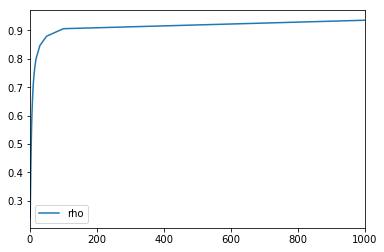

In [37]:
rho_mean=df[['rho']].mean(level=(0))
rho_mean.plot()

In [38]:
rho_mean

,rho
1,0.239649
2,0.335432
3,0.423903
4,0.494546
5,0.552128
6,0.596814
7,0.632238
8,0.661400
9,0.685661
10,0.705990


Let's drop too big values of f to see more details. Let's also plot the deviation

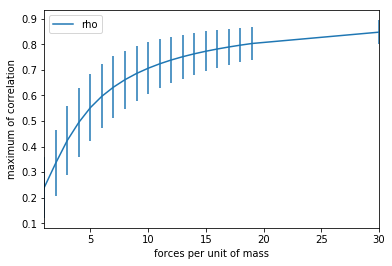

In [39]:
fig, ax = plt.subplots()
rho_mean=df.drop([50,100,1000])[['rho']].mean(level=(0))
rho_std=df.drop([50,100,1000])[['rho']].std(level=(0))
rho_mean.plot(yerr=rho_std, ax=ax)
plt.xlabel('forces per unit of mass')
plt.ylabel('maximum of correlation')

Let's make an average for each force weighed by the time of the sequence.

In [40]:
import numpy as np

In [41]:
def weighted(row, cols, w="time"):
    return (np.average(row[cols], weights=row[w]))


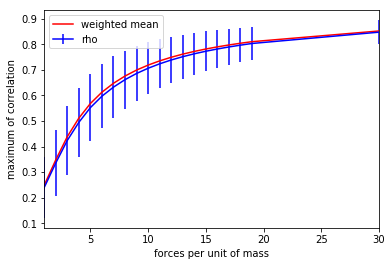

In [42]:
rho_mean_w=df.drop([50,100,1000]).groupby(level=0).apply(weighted, cols='rho', w='time')
fig, ax = plt.subplots()
rho_mean.plot(yerr=rho_std, ax=ax, color='b', label='mean')
rho_mean_w.plot(ax=ax, color='r', label='weighted mean')
plt.xlabel('forces per unit of mass')
plt.ylabel('maximum of correlation')
plt.legend()

We can see that there are little differences when weighted the mean. However, the curve seems to be clause to 1-1/exp. Let's compare

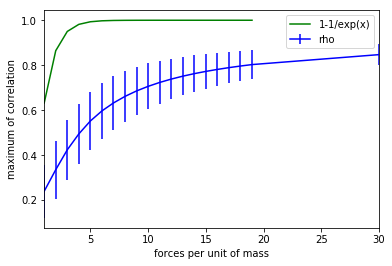

In [43]:
fig, ax = plt.subplots()
rho_mean.plot(yerr=rho_std, ax=ax, color='b', label='mean')
x=np.arange(1,20,1)
y=1-1/np.exp(x)
plt.plot(x,y,'green',label='1-1/exp(x)')
plt.xlabel('forces per unit of mass')
plt.ylabel('maximum of correlation')
plt.legend()

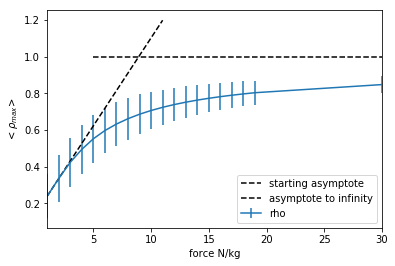

In [44]:
fig, ax = plt.subplots()
rho_mean.plot(yerr=rho_std, ax=ax, legend=False)
x=np.arange(1,12,1)
x2=np.arange(5,31,1)
y=0.095783*x+0.143866
y2=1+0*x2
plt.plot(x,y,'k--',label='starting asymptote')
plt.plot(x2,y2,'k--',label='asymptote to infinity')
plt.xlabel('force N/kg')
plt.ylabel(r'$<\rho_{max}$>')
plt.legend()

It seems that interception point is close to f=8,9N/kg

### Lag function of force

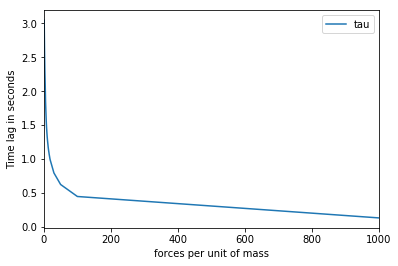

In [14]:
df=lags[['tau','time']].max(level=(0,1))
df['tau']=df['tau']*0.04
fig, ax = plt.subplots()
tau_mean=df[['tau']].mean(level=(0))
tau_mean.plot(ax=ax)
plt.xlabel('forces per unit of mass')
plt.ylabel('Time lag in seconds')
plt.legend()

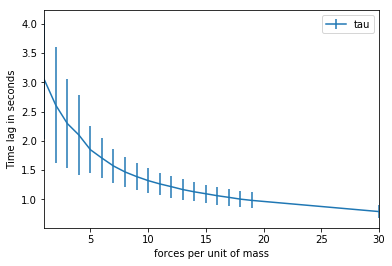

In [15]:
fig, ax = plt.subplots()
tau_mean=df.drop([50,100,1000])[['tau']].mean(level=(0))
tau_std=df.drop([50,100,1000])[['tau']].std(level=(0))
tau_mean.plot(yerr=tau_std, ax=ax)
plt.xlabel('forces per unit of mass')
plt.ylabel('Time lag in seconds')
plt.legend()

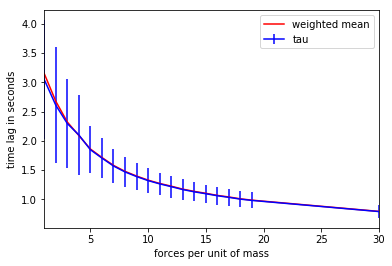

In [16]:
tau_mean_w=df.drop([50,100,1000]).groupby(level=0).apply(weighted, cols='tau', w='time')
fig, ax = plt.subplots()
tau_mean.plot(yerr=tau_std, ax=ax, color='b', label='mean')
tau_mean_w.plot(ax=ax, color='r', label='weighted mean')
plt.xlabel('forces per unit of mass')
plt.ylabel('time lag in seconds')
plt.legend()

### Correlations in the same plot

/Users/gabin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """


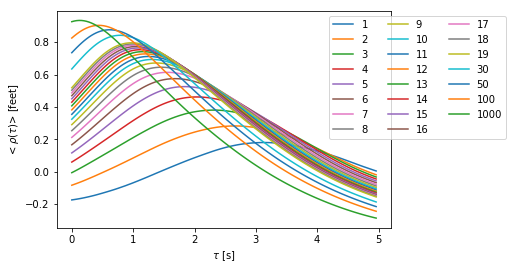

In [60]:
fig, ax = plt.subplots()
Rho=lags[['R']].mean(level=(0,2))
ind=[i for i in range(1,20)]+[30,50,100,1000]
for i in ind:
    time=lags.loc[(1,2)].index*0.04
    plt.plot(time,Rho.loc[i],label=str(i))
plt.legend(bbox_to_anchor=(.8, 1.),ncol=3)
plt.xlabel(r'$\tau$ [s]')
plt.ylabel(r'$<\rho(\tau)$> [feet]')

Let's test visually the result : for a force of 10N/kg, the lag is closed to 34 moments, it means that if we want to test visually we have to shift distance court of 34 moments. Let's test

In [54]:
df=lags[['tau','time']].max(level=(0,1))
tau_mean=df[['tau']].mean(level=(0))
tau_mean.loc[10]

tau    33.030303
Name: 10, dtype: float64

First let's plot court heat-map with distance model

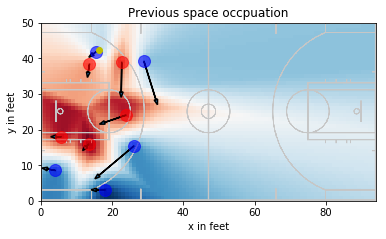

In [71]:
plt.figure(1)
plt.title('Previous space occpuation')
sp.print_court_teams_occupation(events,0,25,value=True)

Then the court heat-map with the speed model

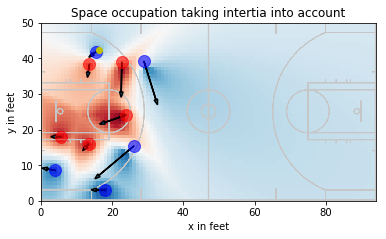

In [72]:
plt.figure(2)
plt.title('Space occupation taking intertia into account')
sp.print_court_teams_occupation_inertia(events,0,25)

Finally the court heat-map with distance model shifted of 34 moments

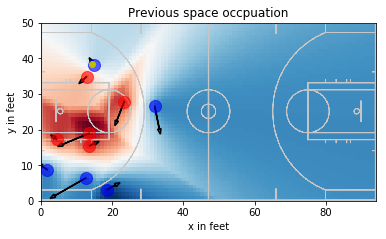

In [73]:
plt.figure(3)
plt.title('Previous space occpuation')
sp.print_court_teams_occupation(events,0,58,value=True)

In [22]:
tau_mean.loc[10]

tau    1.321212
Name: 10, dtype: float64